# Analysis Pipeline

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/data301-2021-winter1/project-group31-project/main/data/raw/player_info.csv?token=AVQ3DF2RLB4AMTUWXP6QW63BPBZHE")

In [3]:
data
# Loaded data from github repository

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,Maple,LW,1998-06-06 01:00:00,ON,"5' 10""",177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,Mt. Clemas,G,1997-09-18 01:00:00,MI,"6' 1""",185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,Sveg,D,1989-03-20 00:00:00,NaN,"6' 4""",193.04,200.0,L
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L


In [4]:
data.shape


(3925, 12)

In [5]:
data.columns
# Looking at columns to eventually clean

Index(['player_id', 'firstName', 'lastName', 'nationality', 'birthCity',
       'primaryPosition', 'birthDate', 'birthStateProvince', 'height',
       'height_cm', 'weight', 'shootsCatches'],
      dtype='object')

In [6]:
data.nunique(axis=0)

player_id             3925
firstName              928
lastName              3153
nationality             28
birthCity             1436
primaryPosition          5
birthDate             3291
birthStateProvince      50
height                  18
height_cm               18
weight                 102
shootsCatches            2
dtype: int64

In [7]:
data.dtypes
# The formatting and data types of the dataset that I will be working with

player_id               int64
firstName              object
lastName               object
nationality            object
birthCity              object
primaryPosition        object
birthDate              object
birthStateProvince     object
height                 object
height_cm             float64
weight                float64
shootsCatches          object
dtype: object

In [8]:
# Dataset is already foratted in an ideal way so checking for delimiters and skipping rows and columns is not needed

## Clean Data

In [9]:
# Now it is time to clean the dataset to remove and uneseccary or unrelated colums from the dataset
data_cleaned = data.drop(['birthCity','birthDate','birthStateProvince','height'], axis='columns')

In [10]:
# I removed the birth city, birth date, birth state / province, and height because I am focusing on the demographics
# and shoting or catching hands of players to see how origin countries affect the average handedness
data_cleaned


,player_id,firstName,lastName,nationality,primaryPosition,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,RW,185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,D,185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,D,180.34,180.0,L
3,8466285,Brian,Campbell,CAN,D,177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,D,190.50,220.0,R
...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,LW,177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,G,185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,D,193.04,200.0,L
3923,8477574,Parker,Milner,USA,G,185.42,185.0,L


In [11]:
# If I wanted to see the whole dataset I would have used the codes
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)
# But the dataset is very large and running that code would make navigating the analysis pipeline an arduous task

In [12]:
#The dataset is a list of active and former NHL players and is purely statistical information regarding the players
# individual stats. As such there is no missing data as the information for each player has been compiled into the
# dataset.

## Process Data

In [13]:
df=data_cleaned

In [14]:
df['shootsCatches'] = df['shootsCatches'].replace(['L','R'],['1','2'])

In [ ]:
#I am going to convert both the shootsCatches and nationality values into float64 types so that I can utilize 
# the data in graph forms from seaborn and pandas


In [15]:
df.dtypes

player_id            int64
firstName           object
lastName            object
nationality         object
primaryPosition     object
height_cm          float64
weight             float64
shootsCatches       object
dtype: object

In [16]:
df['shootsCatches'].astype(str)

0       1
1       2
2       1
3       1
4       2
       ..
3920    1
3921    1
3922    1
3923    1
3924    2
Name: shootsCatches, Length: 3925, dtype: object

In [17]:
pd.to_numeric(df['shootsCatches'])

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
3920    1.0
3921    1.0
3922    1.0
3923    1.0
3924    2.0
Name: shootsCatches, Length: 3925, dtype: float64

In [18]:
df['shootsCatches'] = pd.to_numeric(df['shootsCatches'])

In [19]:
df['shootsCatches']

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
3920    1.0
3921    1.0
3922    1.0
3923    1.0
3924    2.0
Name: shootsCatches, Length: 3925, dtype: float64

In [20]:
df.dtypes

player_id            int64
firstName           object
lastName            object
nationality         object
primaryPosition     object
height_cm          float64
weight             float64
shootsCatches      float64
dtype: object

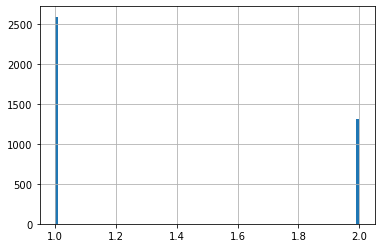

In [21]:
hist = df['shootsCatches'].hist(bins=100)

In [ ]:
# Now that the shootsCatches values are float64 values I can move onto the nationality values

In [22]:
df['nationality'].astype(str)

0       SVK
1       CZE
2       USA
3       CAN
4       CAN
       ... 
3920    CAN
3921    USA
3922    SWE
3923    USA
3924    USA
Name: nationality, Length: 3925, dtype: object

In [23]:
print(pd.unique(data_cleaned['nationality']))

['SVK' 'CZE' 'USA' 'CAN' 'SWE' 'RUS' 'FRA' 'CHE' 'AUT' 'DEU' 'LVA' 'FIN'
 'DNK' 'NOR' 'SVN' 'NLD' 'GBR' 'LTU' 'HRV' 'AUS' 'BLR' nan 'UKR' 'KAZ'
 'NGA' 'BHS' 'JPN' 'POL' 'ITA']


In [24]:
df['nationality'] = df['nationality'].replace(['SVK','CZE','USA','CAN','SWE','RUS','FRA','CHE','AUT','DEU','LVA','FIN','DNK','NOR','SVN','NLD','GBR','LTU','HRV','AUS','BLR','nan','UKR','KAZ','NGA','BHS','JPN','POL','ITA'],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29'])

In [25]:
print(pd.unique(data_cleaned['nationality']))

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' nan '23' '24' '25' '26' '27' '28' '29']


In [27]:
df['nationality'].astype(str)

0       1
1       2
2       3
3       4
4       4
       ..
3920    4
3921    3
3922    5
3923    3
3924    3
Name: nationality, Length: 3925, dtype: object

In [28]:
pd.to_numeric(df['nationality'])

0       1.0
1       2.0
2       3.0
3       4.0
4       4.0
       ... 
3920    4.0
3921    3.0
3922    5.0
3923    3.0
3924    3.0
Name: nationality, Length: 3925, dtype: float64

In [29]:
df.dtypes

player_id            int64
firstName           object
lastName            object
nationality         object
primaryPosition     object
height_cm          float64
weight             float64
shootsCatches      float64
dtype: object

In [33]:
df['nationality'] = pd.to_numeric(df['nationality'])

In [34]:
df.dtypes

player_id            int64
firstName           object
lastName            object
nationality        float64
primaryPosition     object
height_cm          float64
weight             float64
shootsCatches      float64
dtype: object

In [ ]:
# Now that both nationality and shootsCatches are float64 values I can use seaborn graphs and pandas graphs to
# visualize

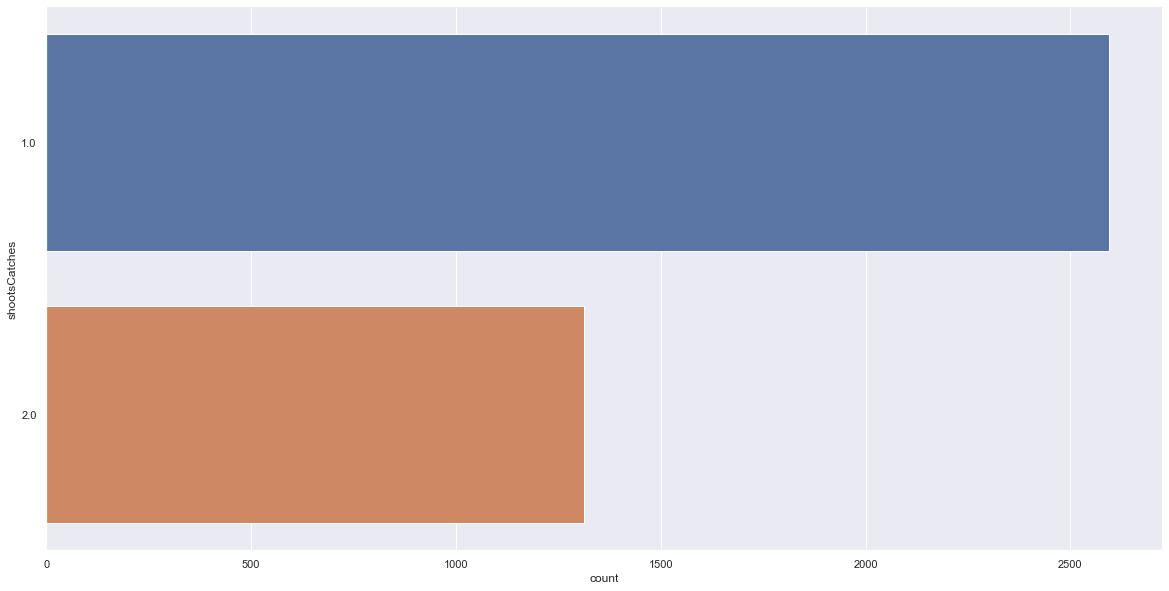

In [54]:
sns.countplot(y='shootsCatches',data=data_cleaned)
sns.despine()

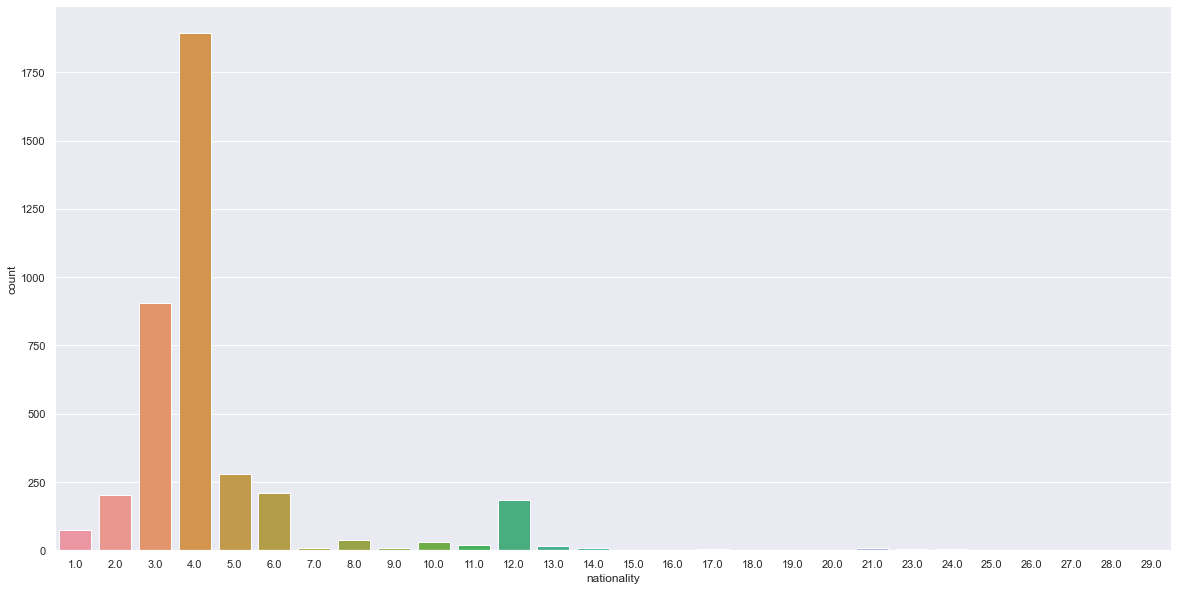

In [55]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='nationality',data=data_cleaned,)
sns.despine()

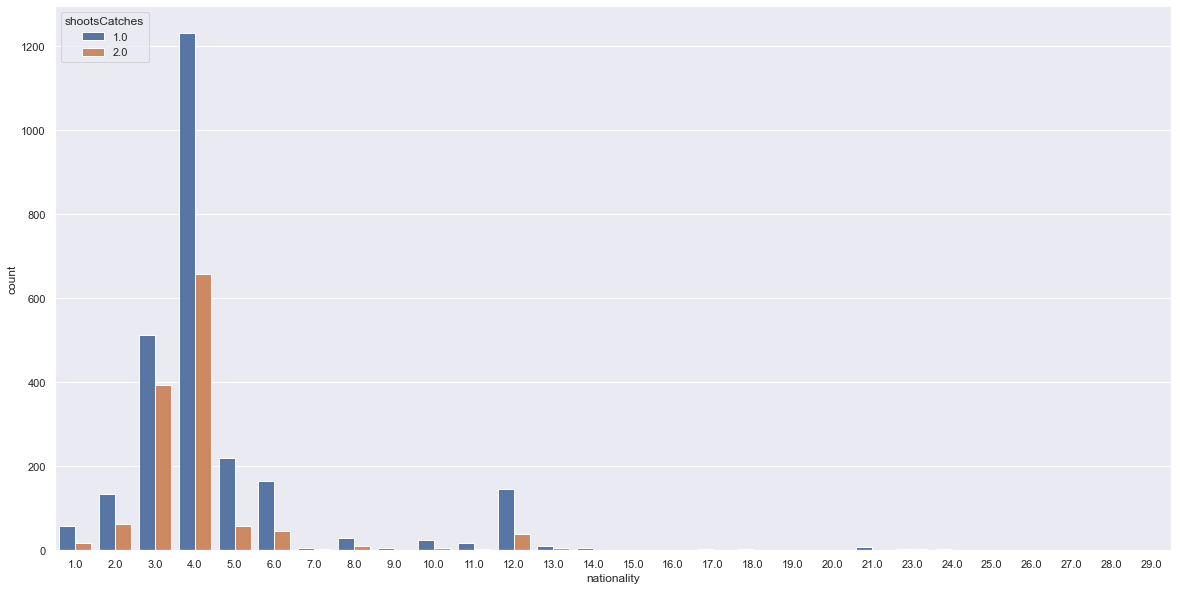

In [53]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='nationality',hue='shootsCatches',data=data_cleaned,)
sns.despine()